In [ ]:
# Testing PFAS prediction with Random Forest with just 1 iteration

In [98]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [99]:
# Read datasets
dataset = pd.read_csv('Non-LipidAdjusted_sigOnly.csv') # import feature extracte MC_DB
dataset = dataset.select_dtypes([np.number]) # select only numerican columns for x and y values 

In [100]:
dataset.head()

,Unnamed: 0,C:M Ratio Master,C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,# Total Atoms,# Atoms w/o Salt,FilterItLogS,PEOE_VSA6,EState_VSA9,NsCl,...,SssssC,ATS0pe,GATS1m,GATS1Z,ATS3are,BCUTdv-1h,ATS0s,ETA_epsilon_3,ATSC3i,ATSC4are
0,0,0.001276,0.004057,0.001276,22.0,22.0,-4.689533,17.288447,15.308119,0.0,...,-4.342906,288.8491,0.765047,0.769887,564.9990,7.014086,305.895833,0.433333,-30.901072,-3.803187
1,1,0.012264,0.039000,0.012264,20.0,20.0,-3.609705,0.000000,4.736863,0.0,...,0.000000,228.9683,0.867692,0.883020,501.2720,6.017822,215.243913,0.437931,-3.016147,-2.116486
2,2,0.019018,0.060477,0.019018,20.0,20.0,-3.562566,31.395199,4.736863,0.0,...,-0.558424,274.1313,1.060515,1.054556,714.8040,6.007457,129.645833,0.437931,-22.574335,0.554080
3,3,0.019040,0.060546,0.019040,54.0,54.0,-9.071417,74.511145,9.473726,0.0,...,0.000000,653.7920,0.812148,0.807016,1580.0348,6.029305,390.423525,0.440260,-25.848412,-2.334104
4,4,0.026178,0.083246,0.026178,24.0,24.0,-5.802049,18.199101,9.998755,0.0,...,-0.562471,277.8472,0.783113,0.782584,654.7130,7.004057,203.951389,0.441176,-13.861326,-1.324305


In [101]:
dataset.drop(['# Total Atoms', '# Atoms w/o Salt'], axis =1)

,Unnamed: 0,C:M Ratio Master,C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,FilterItLogS,PEOE_VSA6,EState_VSA9,NsCl,nCl,SMR,...,SssssC,ATS0pe,GATS1m,GATS1Z,ATS3are,BCUTdv-1h,ATS0s,ETA_epsilon_3,ATSC3i,ATSC4are
0,0,0.001276,0.004057,0.001276,-4.689533,17.288447,15.308119,0.0,0.0,78.7144,...,-4.342906,288.8491,0.765047,0.769887,564.9990,7.014086,305.895833,0.433333,-30.901072,-3.803187
1,1,0.012264,0.039000,0.012264,-3.609705,0.000000,4.736863,0.0,0.0,75.7646,...,0.000000,228.9683,0.867692,0.883020,501.2720,6.017822,215.243913,0.437931,-3.016147,-2.116486
2,2,0.019018,0.060477,0.019018,-3.562566,31.395199,4.736863,0.0,0.0,82.3238,...,-0.558424,274.1313,1.060515,1.054556,714.8040,6.007457,129.645833,0.437931,-22.574335,0.554080
3,3,0.019040,0.060546,0.019040,-9.071417,74.511145,9.473726,0.0,0.0,212.5451,...,0.000000,653.7920,0.812148,0.807016,1580.0348,6.029305,390.423525,0.440260,-25.848412,-2.334104
4,4,0.026178,0.083246,0.026178,-5.802049,18.199101,9.998755,0.0,0.0,90.9140,...,-0.562471,277.8472,0.783113,0.782584,654.7130,7.004057,203.951389,0.441176,-13.861326,-1.324305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,4.099421,13.036158,4.099421,-3.501124,23.733674,16.707467,1.0,1.0,69.5450,...,-0.478520,214.5469,0.712733,0.706422,504.9810,6.021927,152.984463,0.433333,-1.230345,-1.550612
260,260,6.694215,21.287603,6.694215,-4.344412,24.265468,10.213055,0.0,0.0,69.1036,...,-15.666875,264.6471,0.575175,0.587741,539.1600,7.017330,513.798611,0.437313,-82.473729,13.552507
261,261,11.888889,37.806667,11.888889,-5.469447,0.000000,0.000000,0.0,0.0,103.4385,...,0.000000,302.3893,0.981190,0.975154,694.7840,6.021954,155.888889,0.437143,48.628331,-1.359158
262,262,13.888889,44.166667,13.888889,-1.240852,12.132734,5.106527,0.0,0.0,44.7408,...,0.000000,144.5769,0.698827,0.694761,234.2200,6.028527,185.361111,0.433333,-10.838468,-2.598458


In [102]:
datasetR1 = dataset.loc[:, 'FilterItLogS':'ATSC4are'] # select the mordred descriptors 
datasetR2 = dataset.loc[:, 'C:M Ratio Lipid Normalized':'C:M Ratio Non-Lipid Normalized'] # select the CM Ratios

In [103]:
df_PFAS = pd.read_csv('df_mordred_PFAS_MasterList.csv')
df_PFAS = df_PFAS.select_dtypes([np.number])
df_PFAS = df_PFAS.loc[:, df_PFAS.columns.isin(datasetR1.columns)] # extract the PFAS_DB columns that are present in datasetR1 (same mordred descriptors)

C:\Users\Adi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (145,146,147,154,155,156,163,164,165,172,173,174,181,182,183,190,191,192,199,200,201,208,209,210,217,218,219,226,227,228,235,236,237,240,241,242,243,244,245,246,247,248,348,349,350,351,352,353,361,362,363,370,371,372,379,380,381,388,389,390,397,398,399,406,407,408,415,416,417,424,425,426,433,434,435,442,443,444,451,452,453,456,457,458,459,460,467,468,469,475,476,477,483,484,485,491,492,493,499,500,501,507,508,509,515,516,517,523,524,525,531,532,533,539,540,541,547,548,549,552,553,554,555,556,563,564,565,571,572,573,579,580,581,587,588,589,595,596,597,603,604,605,611,612,613,619,620,621,627,628,629,635,636,637,643,644,645,648,649,822,823,877,878,893,894,1115,1134,1194,1213,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1289,1292,1294,1584) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, res

In [104]:
datasetR1 = datasetR1.loc[:, datasetR1.columns.isin(df_PFAS.columns)] # extract the datasetR1 columns that are present in PFAS_DB

In [105]:
df_PFAS.shape, datasetR1.shape

((7986, 444), (264, 444))

In [106]:
df_PFAS = df_PFAS.reindex(sorted(df_PFAS.columns), axis=1) # sort the columns 
datasetR1 = datasetR1.reindex(sorted(datasetR1.columns), axis=1)

In [107]:
dataset = pd.concat([datasetR1, datasetR2], axis=1) # Re-add the log cm columns 

In [110]:
dataset.columns.values

array(['AATS0d', 'AATS0dv', 'AATS0i', 'AATS0p', 'AATS0s', 'AATS0v',
       'AATS1i', 'AATS1p', 'AATS1s', 'AATS1v', 'AATS2d', 'AATS2i',
       'AATS2p', 'AATS2s', 'AATS2v', 'AATSC0are', 'AATSC0dv', 'AATSC0i',
       'AATSC0s', 'AATSC1are', 'AATSC1i', 'AATSC1pe', 'AATSC1s',
       'AATSC1se', 'AATSC2dv', 'ABC', 'ABCGG', 'AETA_alpha',
       'AETA_beta_ns_d', 'AETA_eta', 'AMID_O', 'AMID_X', 'AMW', 'ATS0d',
       'ATS0p', 'ATS0pe', 'ATS0s', 'ATS0se', 'ATS0v', 'ATS1Z', 'ATS1are',
       'ATS1d', 'ATS1i', 'ATS1m', 'ATS1p', 'ATS1pe', 'ATS1se', 'ATS1v',
       'ATS2Z', 'ATS2are', 'ATS2d', 'ATS2i', 'ATS2m', 'ATS2p', 'ATS2pe',
       'ATS2se', 'ATS2v', 'ATS3Z', 'ATS3are', 'ATS3d', 'ATS3i', 'ATS3m',
       'ATS3p', 'ATS3pe', 'ATS3se', 'ATS3v', 'ATS4Z', 'ATS4d', 'ATS4i',
       'ATS4p', 'ATS4pe', 'ATS4se', 'ATS4v', 'ATS5Z', 'ATS5d', 'ATS5i',
       'ATS5m', 'ATS5p', 'ATS5pe', 'ATS5se', 'ATS5v', 'ATS6Z', 'ATS6are',
       'ATS6d', 'ATS6i', 'ATS6m', 'ATS6p', 'ATS6pe', 'ATS6se', 'ATS6v',
       'ATS

In [111]:
dataset['C:M Ratio Lipid Normalized'] = dataset['C:M Ratio Lipid Normalized'].replace(0, 0.01)
dataset['logCM'] = np.log10(dataset['C:M Ratio Lipid Normalized'])

In [112]:
dataset['logCM_non_adjusted'] = np.log10(dataset['C:M Ratio Non-Lipid Normalized'])

In [113]:
# Rhow dataframe column names
dataset.columns.values

array(['AATS0d', 'AATS0dv', 'AATS0i', 'AATS0p', 'AATS0s', 'AATS0v',
       'AATS1i', 'AATS1p', 'AATS1s', 'AATS1v', 'AATS2d', 'AATS2i',
       'AATS2p', 'AATS2s', 'AATS2v', 'AATSC0are', 'AATSC0dv', 'AATSC0i',
       'AATSC0s', 'AATSC1are', 'AATSC1i', 'AATSC1pe', 'AATSC1s',
       'AATSC1se', 'AATSC2dv', 'ABC', 'ABCGG', 'AETA_alpha',
       'AETA_beta_ns_d', 'AETA_eta', 'AMID_O', 'AMID_X', 'AMW', 'ATS0d',
       'ATS0p', 'ATS0pe', 'ATS0s', 'ATS0se', 'ATS0v', 'ATS1Z', 'ATS1are',
       'ATS1d', 'ATS1i', 'ATS1m', 'ATS1p', 'ATS1pe', 'ATS1se', 'ATS1v',
       'ATS2Z', 'ATS2are', 'ATS2d', 'ATS2i', 'ATS2m', 'ATS2p', 'ATS2pe',
       'ATS2se', 'ATS2v', 'ATS3Z', 'ATS3are', 'ATS3d', 'ATS3i', 'ATS3m',
       'ATS3p', 'ATS3pe', 'ATS3se', 'ATS3v', 'ATS4Z', 'ATS4d', 'ATS4i',
       'ATS4p', 'ATS4pe', 'ATS4se', 'ATS4v', 'ATS5Z', 'ATS5d', 'ATS5i',
       'ATS5m', 'ATS5p', 'ATS5pe', 'ATS5se', 'ATS5v', 'ATS6Z', 'ATS6are',
       'ATS6d', 'ATS6i', 'ATS6m', 'ATS6p', 'ATS6pe', 'ATS6se', 'ATS6v',
       'ATS

In [114]:
# Assign X and y variables
X = dataset.loc[:, 'AATS0d':'piPC9'].values
y = dataset.loc[:, 'logCM_non_adjusted'].values

In [115]:
# y-randomization - use only in y-randomization analysis
#from sklearn.utils import shuffle
#y = shuffle(y, random_state=4)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    
# Normalize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Compile RF regressor
regressor = RandomForestRegressor(n_estimators= 200, bootstrap = True, 
                                  max_depth = None, max_features = 'sqrt',
                                  min_samples_leaf = 1, min_samples_split = 2)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [117]:
# Use model to make predictions for training set
y_pred = regressor.predict(X_train).flatten()

In [118]:
# Calculate error statistics for train set
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 0.11126714112989262
Mean Squared Error: 0.029523131016220783
Root Mean Squared Error: 0.17182296417016202


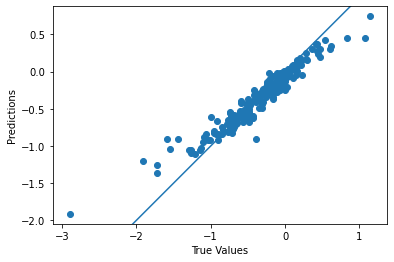

In [119]:
# Plot true vs predicted values for the train set
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [120]:
# Export data into a dataframe
df = pd.DataFrame({'predicted_values':y_pred, 'true_values':y_train})
df.to_csv('forest_plus_tr_PFAS_test.csv')

In [121]:
df_PFAS

,AATS0d,AATS0dv,AATS0i,AATS0p,AATS0s,AATS0v,AATS1i,AATS1p,AATS1s,AATS1v,...,piPC1,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9
0,4.555556,31.222222,221.588479,1.069185,34.471836,235.848687,170.679462,1.341994,7.295343,286.401973,...,2.833213,0.000000,3.332205,3.401197,2.944439,2.944439,2.944439,2.302585,0.000000,0.000000
1,4.526316,31.473684,219.686521,1.046765,33.302266,234.824587,171.191286,1.261315,7.291281,280.598647,...,2.890372,0.000000,3.367296,3.295837,3.218876,3.258097,2.708050,2.302585,2.302585,0.000000
2,4.555556,31.222222,221.588479,1.069185,34.471836,235.848687,170.679462,1.341994,7.297386,286.401973,...,2.833213,0.000000,3.332205,3.401197,3.091042,2.944439,2.772589,2.302585,0.000000,0.000000
3,3.303030,7.878788,165.465792,1.487492,4.496633,220.471392,147.062553,1.815305,3.063492,267.495025,...,3.277145,6.551323,3.860730,4.454347,5.067331,5.639688,5.896295,6.231465,6.574509,6.868169
4,3.303030,7.878788,165.465792,1.487492,4.496633,220.471392,147.062553,1.815305,3.063492,267.495025,...,3.277145,6.551323,3.860730,4.454347,5.067331,5.639688,5.896295,6.231465,6.574509,6.868169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,4.921053,30.736842,225.909167,1.128184,34.351060,237.743137,168.138363,1.490496,6.468468,295.128385,...,3.526361,3.218876,4.127134,4.454347,4.369448,4.248495,4.110874,3.951244,3.761200,3.526361
7982,4.000000,21.200898,209.159370,1.818338,24.272428,277.166921,163.661643,1.880685,5.013812,309.580614,...,2.197225,0.000000,2.639057,2.564949,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000
7983,3.363636,20.509540,210.682845,1.426721,24.218285,234.177175,164.371958,1.627979,5.068519,274.854685,...,2.079442,0.000000,2.397895,2.197225,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000
7984,3.278351,14.891180,189.062938,1.186127,14.650567,194.932414,156.295670,1.495063,3.883102,243.531229,...,4.077537,4.174387,4.510860,4.753590,4.672829,4.605170,4.532599,4.454347,4.369448,4.276666


In [122]:
# normalize PFAS testing set
PFAS_X_test = df_PFAS.values
PFAS_X_test = sc.transform(PFAS_X_test)

In [123]:
# Use model to make predictions for PFAS
y_pred = regressor.predict(PFAS_X_test).flatten()

In [124]:
y_pred

array([ 0.16530457,  0.07062672,  0.12312907, ...,  0.13331595,
       -0.71268111, -0.07351143])

In [133]:
# Export data to a dataframe
import pandas as pd
df = pd.DataFrame({'predicted_values':y_pred})
print(df.head())

   predicted_values
0          0.165305
1          0.070627
2          0.123129
3         -0.173543
4         -0.154317


In [ ]:
# Print data to a csv file
df.to_csv('forestplus_ts_PFAS_test.csv')